# ICS 434: DATA SCIENCE FUNDAMENTALS

## Logistic Regression

---

In [7]:
# %load ../standard_import.txt
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf



### Logistic Regrssion

* The linear regression model discussed assumes response is quantitative but in many situations, the response variable is instead categorical (label)

* Logistic Regression for the outcome to be qualitative (or categorical)
  * The main difference between linear versus logistic regression is in the type of outcomes predicted

* Email: SPAM vs. HAM
* An individual will get a disease or not
* Etc.

* Logistic Regression is one among many solutions to classification


### Classification

* Classification takes a set of input values from variables and assigns them to a categorical outcome 
 * A qualitative outcome is one that takes values in a set of possible categories  
* Often, we are interested in predicting the probability that an input belongs to each category
  * We can then take the assignment with the highest probability
  * I.e., more relevant to say a computer is infected with 0.99 probability or 0.52 probability than just infected

### Classes of Logistic Regression

* There are two types of logistic regression into:
  * Simple or binary logistic regression
  * Multiclass logistic regression
* We focus on (binary) logistic regression
  * Ease to generalize to more than two classes

### Dataset 

* People who default on their credit card paymment (brown marks) versus those who don't (blue circles)

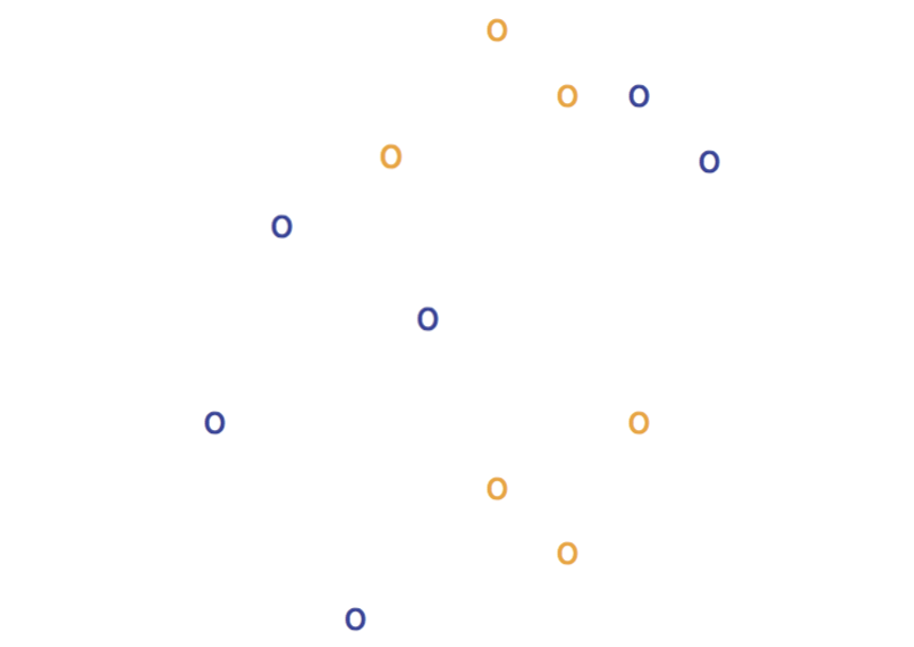

### Justification for logistic regression

- Can we use linear regression to determine whether a client defaults on credit card payment? How?
    - One possible way is to assign given output to classes (say 0 and 1) and use linear regression to generate value that span the 0,1 range

$$
\left\{
    \begin{array}{ll}
        1 & \mbox{if default} \\
        0 & \mbox{otherwise}
    \end{array}
\right.
$$


### Using Linear in Classification

<img src="https://www.dropbox.com/scl/fi/3h2gyetfuy79w8oyqvgga/regression_1.png?rlkey=us74wjptwy10xslyc0ruzrla4&dl=1" alt="drawing" style="width:500px;"/>



### Using Linear in Classification - Cont'd


* Remember that linear regression predicts continuous values
* We can say then that: 
  * Any value that our linear regression predicts as above a certain threshold represents class 1
  * Any value that our linear regression predicts below a certain threshold represents class 0
* 0.5 is a reasonable threshold as it sits exactly in the middle classes 0 and 1
  

### Using Linear in Classification - Model

<img src="images/regression_2.png" alt="drawing" style="width:500px;"/>


### Using Linear in Classification - Prediction

<img src="https://www.dropbox.com/scl/fi/dbx0yfzg59q3hncf13r8e/regression_2.png?rlkey=bmgg65bt0haof6nmysyotswd9&dl=1" alt="drawing" style="width:800px;"/>


<img src="https://www.dropbox.com/scl/fi/m0m5nno7tkovrrgltmdkn/regression_3.png?rlkey=z362yy7rbs6ewwmh9chslvrio&dl=1" alt="drawing" style="width:800px;"/>

### Inconvenients of Using Linear Regression

* Problems with "hacking" linear regression for classification


* The regression line is sensitive to the data
  * outliers can drastically change the intersection point of the threshold on the line
  

* Predicted value can be much smaller than 0 or much larger than 1
  * Impossible to interpret as a probability

<img src="https://www.dropbox.com/scl/fi/zobw7sbg9ci5iobnf3sjn/regression_4.png?rlkey=kj1rt0j0rmsdbthkjam3qawl9&dl=1" alt="drawing" style="width:500px;"/>


## Logistic Regression

* A very simple yet popular method for classification

* Constrains the predicted value to be between 0 and 1
  * Can be interpreted as a probability for a class
  
Use the logistic, or sigmoid function, to model the separation between the classes


$$ g(x) = \frac{1}{1+e^-(\beta_0 + \beta_1~x)}$$



## Logistic Regression

* Assuming $\beta_0=0$ and $\beta_1=1$

<img src="https://www.dropbox.com/scl/fi/s1xxyeqjg3udim8pivumk/logistic_regression.png?rlkey=1yv1rw8wi5qlys4co0gkg9bh9&dl=1" alt="drawing" style="width:700px;"/>

* The logistic function g(x) provides $prob(y=1~|~x, \beta_0, \beta_1)$
  * The probability that a value x is 1.


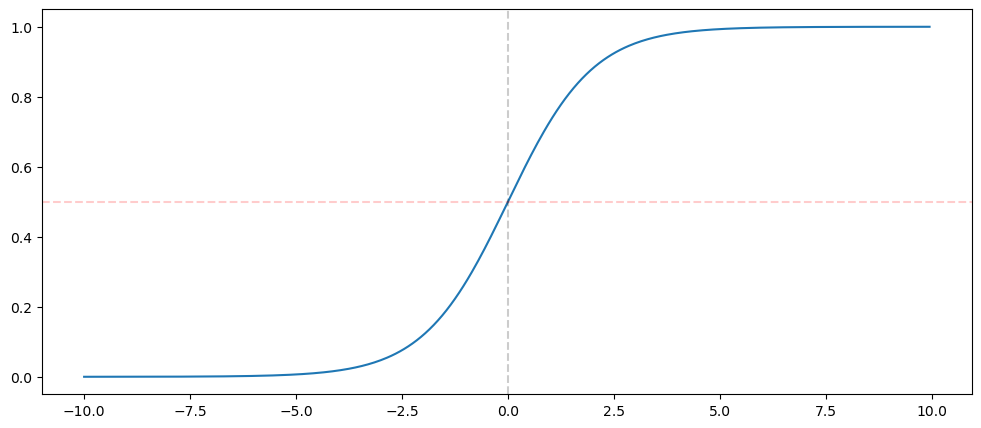

In [9]:
x_axis = np.arange(-10, 10, 0.05)
y_axis = 1 / (1 + np.e**-x_axis)
plt.figure(figsize=(12,5))
plt.plot(x_axis, y_axis)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)

### Parameters of the Logstic 
- As with the linear regression, we assumed that the params of the model $\beta_0$ and $\beta_1$ can be any value

### Changing $\beta_0$

<img src="https://www.dropbox.com/scl/fi/xvdkkurqssandvmwzfwrc/changing_beta0.png?rlkey=0eeuzt40uv4rwl2n6ulu11064&dl=1" alt="drawing" style="width:1500px;"/>


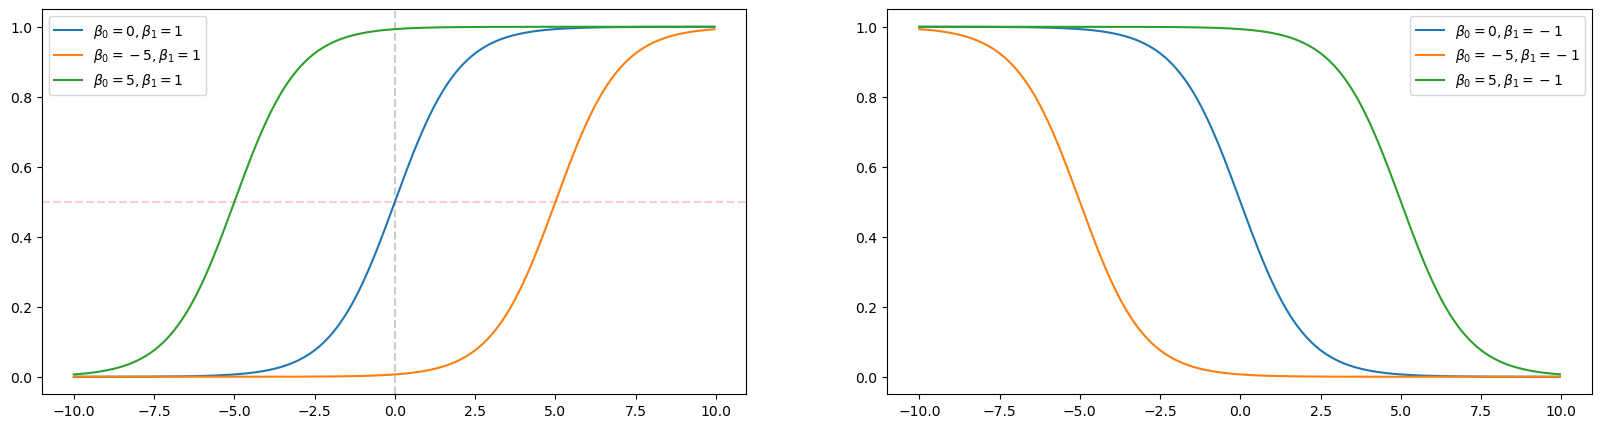

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)
x = np.arange(-10, 10, 0.05)

beta_0, beta_1 = (0, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (-5, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (5, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()

plt.subplot(1, 2, 2)
beta_0, beta_1 = (0, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (-5, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (5, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()


### Changing $\beta_1$

<img src="https://www.dropbox.com/scl/fi/hklmqz2a1vain566w5dur/logistic_beta_1.png?rlkey=z15wtbmnfld0emmrawaack3ov&dl=1" alt="drawing" style="width:1500px;"/>


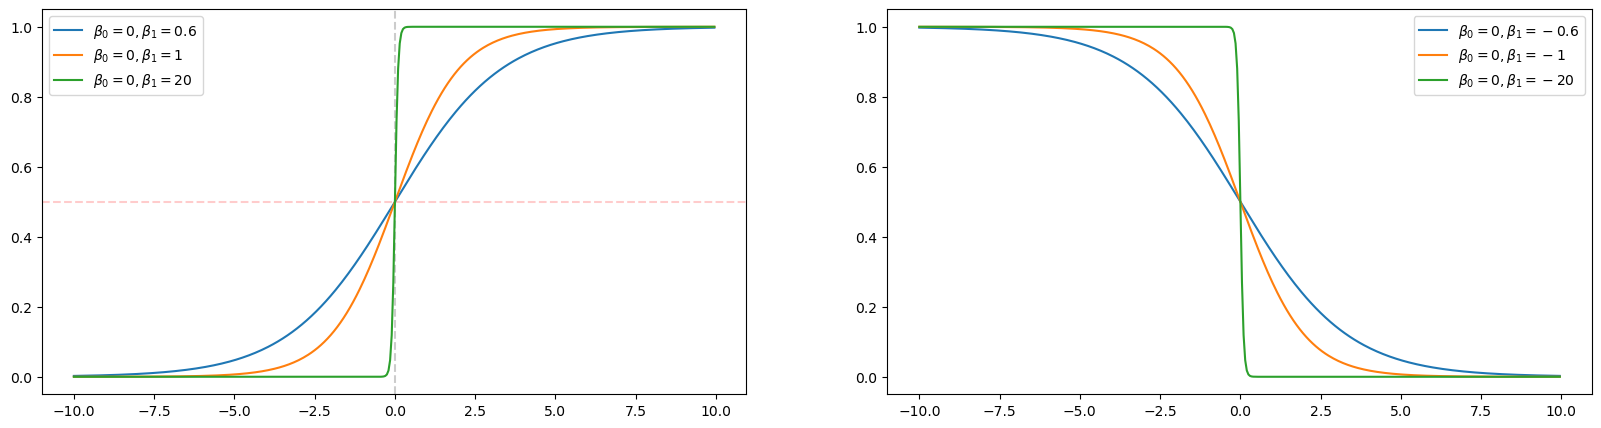

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)
x = np.arange(-10, 10, 0.05)

beta_0, beta_1 = (0, 0.6) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, 20) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()

plt.subplot(1, 2, 2)
beta_0, beta_1 = (0, -0.6) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, -20) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()


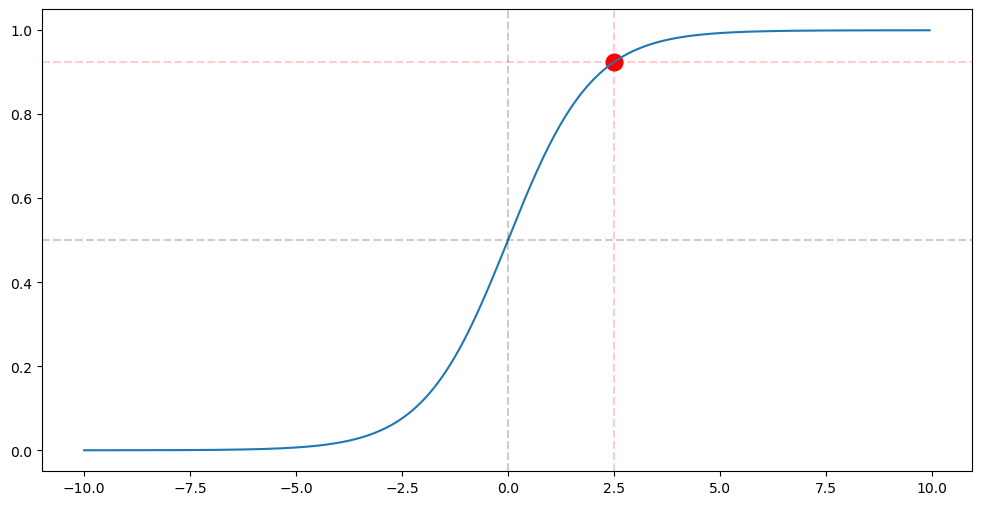

In [14]:
x_axis = np.arange(-10, 10, 0.05)
y_axis = 1 / (1 + np.e**-x_axis)
plt.figure(figsize=(12,6))
plt.plot([2.5], [1 / (1 + np.e**-2.5)], 'or', markersize=12)

plt.plot(x_axis, y_axis)
plt.axhline(0.5, linestyle="--", color='k', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)

plt.axhline(1 / (1 + np.e**-2.5), linestyle="--", color='r', alpha=0.2)
plt.axvline(2.5, linestyle="--", color='r', alpha=0.2)




### Fitting the Model: Linear Regression Parallel

* For the Linear regression, we used the data to parameterize the model
  * We trained the model to find the line that minimizes the RSS 
  * I.e, among all possible lines, the one selected has the smallest sum of squared residuals
  
  

### Fitting the Model

* In binary logistic regression, the outcomes  are 0 and 1, and the predictions are also either 0 or 1

* One trivial approach would consist in identifying the sigmoid function that minimizes the mispredictions
*  Using the same method as in linear regression, we could describe the function as:

$$
\frac{1}{n} \sum_1^n (g(x) - y)
$$

* Unfortunately, this function is not convex 

  *  Does guarantee that the function will converge to the global minimum

### Fitting the Model- Cont'd


- Instead, given some tuple (beta_0 and beta_1), the following convex function is commonly used to compute the cost (loss)

$$
    cost(g(x),y) = \left\{
    \begin{array}{ll}
        -log(g(x)) & \mbox{ if }  y = 1 \\
        -log(1 - g(x)) & \mbox{ if }  y = 0 \\
    \end{array}
\right.
$$

* Remember that $g(x)$ is simply the probability that the class is 1

* We want to values of $\beta_0$ and $\beta_1$ that minimize the total loss



### Cost Function Explained - $y=1$

$$
        -log(g(x)) \mbox{ if }  y = 1
$$

* For $y = 1$
  - If the prediction is also 1, then we incur no cost 
  - If the prediction is 0, then we are incurring a large cost 
  - Values close to 1 incure minimal cost.
  
  

In [15]:
np.log(1), -np.log(0.5), -np.log(0.1), -np.log(0.00000001) 

(0.0, 0.6931471805599453, 2.3025850929940455, 18.420680743952367)

(0.0, 3.0)

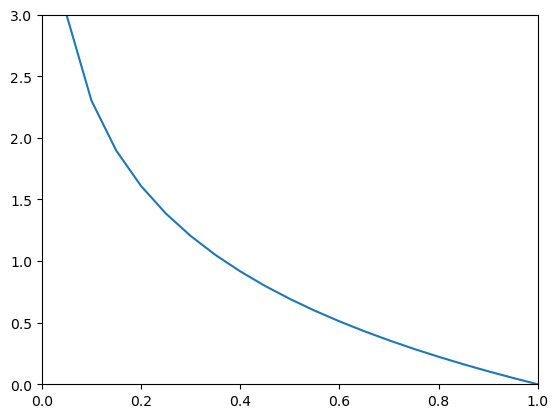

In [16]:
x_axis = np.arange(0.000001, 1.1, 0.05)
y_axis = - np.log(x_axis)
plt.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,3)

### Cost Function Explained - $y=1$

$$
        -log(1 - g_(x)) \mbox{ if }  y = 0 \\
$$
- for $y = 0$
  - If the prediction is also 0, then we incur no cost 
  - If the prediction is 1, then we are incurring an infinite cost 


In [17]:
np.log(1-0), -np.log(1-0.2), -np.log(1-0.5), -np.log(1-0.99999999)

(0.0, 0.2231435513142097, 0.6931471805599453, 18.420680738927608)

(0.0, 3.0)

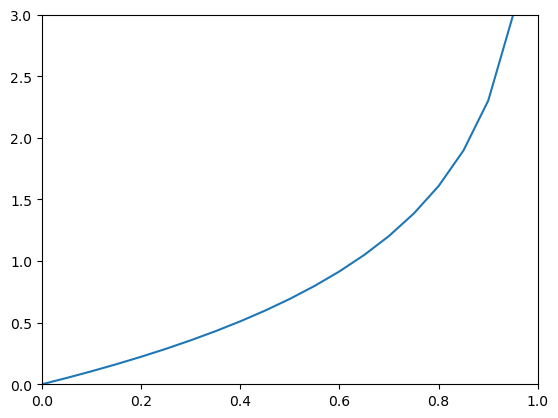

In [18]:
x_axis = np.arange(0, 0.9999999, 0.05)
y_axis = - np.log(1 - x_axis)
plt.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,3)

### Training

- Therefore, by averaging the cost over all instances in the data, we end up with the parameters ($\beta$s) that best fit the data

- Thus for a dataset of size $n$, we pick the tuple $\beta$ of params which minimizes:

$$
\sum_{\forall x}cost(g(x)_{\beta},y)~~/~~n
$$


### Prediction

* Use the parameters $\beta$ identified in the training to predict the probabality of true using
$$
p(y=1| x, \beta_0,\beta_1) = g(x) = \frac{1}{1+e^{\beta_0+\beta_1~x}}
$$
 *  Probabolty of False is merely $1- p(y=1| x, \beta_0,\beta_1)$


In [19]:
data = pd.read_excel("data/Default.xlsx")
data.head()


/Users/mahdi/miniconda3/envs/temp/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [20]:

data["encoded_default"] = data["default"].map({"No":0, "Yes":1})

data.head()

,Unnamed: 0,default,student,balance,income,encoded_default
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,0
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0


### Logistic Regression with `sklearn`

* Using statsmodels, we can infer the values of $\beta_0$ and $\beta_1$ such that

$$
    default = \frac{1}{1 + e^{-(\beta_o + \beta_1 ~ balance})} + \epsilon_x
$$

* Similar  to the regression, $\epsilon$ is the noise component


In [21]:
data.loc[:, "balance"]

0        729.526495
1        817.180407
2       1073.549164
3        529.250605
4        785.655883
           ...     
9995     711.555020
9996     757.962918
9997     845.411989
9998    1569.009053
9999     200.922183
Name: balance, Length: 10000, dtype: float64

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, solver='lbfgs')
#  We use the limited memory Broyden–Fletcher–Goldfarb–Shanno optimization algorithm

X = data["balance"].values.reshape(-1,1) 
Y = data["encoded_default"].values 
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

In [23]:
logreg.coef_, logreg.intercept_

(array([[0.00549892]]), array([-10.65132867]))

### Model Interpretation - Balance


$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{10 - 0.005 \times balance}}
$$

- Note that $\beta_1$ reflects the units, which in this case is dollar

- Therefore, an increase of a balance of $1, increases the probability of defaulting by 
  
$$
    P(default=1| x=1, \beta_0=-10.65, \beta_1=0.0055) \approx \frac{1}{1 + e^{10 - 0.005 * 1}} = 0.000045
$$

- An increase of a balnce of $2,000, increases the probability of defaulting by 

$$
    P(default=1| x=2,000, \beta_0=-10.65, \beta_1=0.0055) \approx \frac{1}{1 + e^{10 - 0.0005 * 2,000}} \approx 0.5
$$


### Multiple Logistic Regression
- Relation to Linear Regression: Utilizes multiple predictors but applies logistic function to model the outcome as probabilities (0 or 1).
-  Incorporates multiple predictors like age, income, education.
- Model Equation: 
 $$
 \text{logit}(p) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
$$  
Where $p$ is the outcome probability, $\beta_i$ are coefficients, and $x_i$ are predictors.
- Usage: Useful for predicting binary outcomes in scenarios with multiple influencing factors.


In [24]:
data["encoded_student"] = data["student"].map({"No":0, "Yes":1})
data.head()

,Unnamed: 0,default,student,balance,income,encoded_default,encoded_student
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


In [25]:
X = data["encoded_student"].values.reshape(-1,1)
y = data["encoded_default"].values

logreg.fit(X, Y)
logreg.coef_, logreg.intercept_

(array([[0.40489192]]), array([-3.50412908]))

### Model Interpretation - Student Status


$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{3.5 - 0.4 ~ student}}
$$

- the probability of a student defaulting is 

$$
    P(default=1| x=1, \beta_0=-3.5, \beta_1=0.4) \approx \frac{1}{1 + e^{3.5 - 0.4 \times 1}} \approx 0.04
$$


- the probability of a non student defaulting is 

$$
    P(default=1 | x=0, \beta_0=-3.5, \beta_1=0.4) \approx \frac{1}{1 + e^{-3.5 - 0.4 \times student}} \approx 0.02
$$



### Multiple Logistic Regression 

* As we add more relevant variables, the logistic regression model becomes more discriminative.

  * We could combine  into a single regression the student status, total debt, age, income, number of recent credit applications, etc.

In [26]:
X = data[['balance', 'encoded_student']]

y = data["encoded_default"].values

logreg.fit(X, Y)

logreg.coef_, logreg.intercept_


(array([[ 0.0057381 , -0.71487752]]), array([-10.74949566]))

$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{10  - 0.0005 \times balance + 0.71 \times student}}
$$

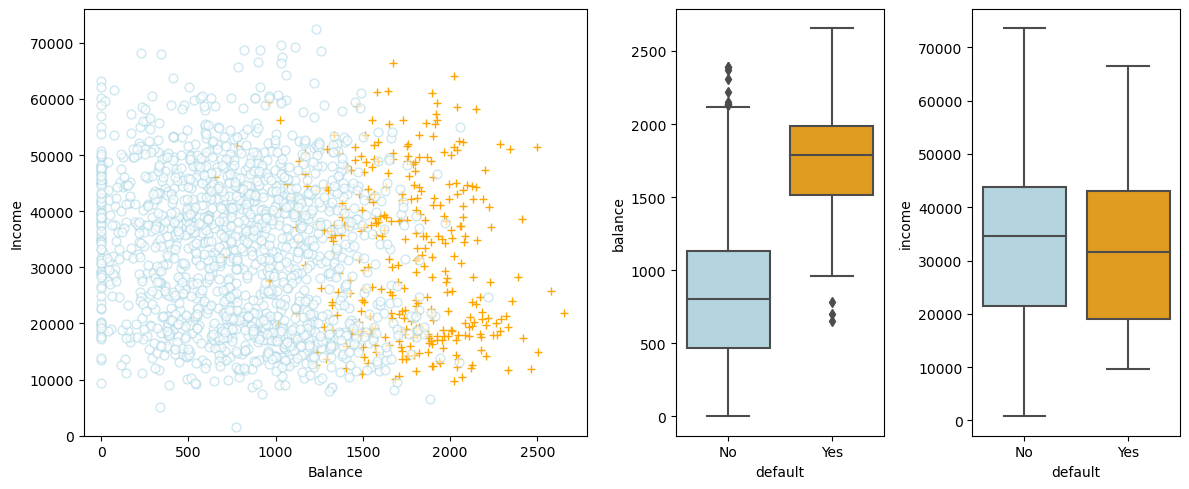

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = data[data["encoded_default"] == 0].sample(frac=0.15)
# Take all samples where target value is 'yes'
df_yes = data[data["encoded_default"] == 1]
df_ = pd.concat([df_no, df_yes])

ax1.scatter(df_[df_['default'] == 'Yes'].balance, df_[df_['default'] == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_['default'] == 'No'].balance, df_[df_['default'] == 'No'].income, s=40, marker='o', linewidths=1,
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(x='default', y='balance', data=data, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='default', y='income', data=data, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())


### Inspecting the Contribution of Income

- The plot above did not indicate that income is useful for separating the data

  - What does the logistic regression model say about the contribution of the variable income?

In [43]:
X = sm.add_constant(data[['balance', 'income', 'encoded_student']])

y = data["encoded_default"].values

logreg.fit(X, Y)

logreg.coef_


array([[-2.67640576e+00,  4.91924349e-03, -1.00364967e-04,
        -3.52829225e+00]])

### Categortical Variables as Predictors

* A Categorical variable (sometimes called a nominal variable) is one that has two or more categories

  * categorical variables have no intrinsic ordering to the categories

* For instance, car types can be encoded as electric (0), sedan (1), compact (2), SUV (3), etc...

* The resulting numerical encoding does not have the same meaning as regular numerical values

  * Ex.: we cannot use the encoding to compute Euclidean distance or to compute averages on features

* Data values for electric 0 and sedan 1 are not more similar than those with the values 0 and 2 ('electric' and 'compact')





### One-Hot-Encoding


* Categorical variables are commonly encoded using attributes for each category

* The value is 1 for the attribute if the instance is in that category or the value is 0 otherwise

* Ex.:
  * if a data point is of type electric vehicle 0, then its encoding would be [1,0,0,0]
  * if a data point is in SUV 4, then its encoding would be [0,0,0,1]

* etc...



### Relationship Between Logistic and Linear Model

We have:

$$p(x) = \frac{1}{1+e^-(\beta_0 + \beta_1~x)}$$

or:

$$p(x) = \frac{e^{(\beta_0 + \beta_1~x)}}{1+e^{e(\beta_0 + \beta_1~x)}}$$

This can be written as

$$\frac{p(x)}{1-p(x)} = e^{(\beta_0 + \beta_1~x)}$$



### Relationship Between Logistic and Linear Model - Cont'd


* The ratio $\frac{p(x)}{1-p(x)}$ is the odd ratio
   * Takes values between 0 and $\inf$
   
   
* Say the probavility of defaulting is p(x) = 0.2, then  $\frac{p(x)}{1-p(x)} = 1/5$
  * So, 1 in 5 people will defautl

### Relationship Between Logistic and Linear Model - Cont'd

We have that:
    
$$\frac{p(x)}{1-p(x)} = e^{(\beta_0 + \beta_1~x)}$$

By taking log on both side, we have:

This can be written as

$$log(\frac{p(x)}{1-p(x)}) =(\beta_0 + \beta_1~x)$$

* Left hand side if called log-odds or logit

* Therefore, the linear model has a logit that is linear in $X$

Unline in linear model, $\beta_1$ does not correspond to the change associate in one-unit increase in X.
